<a href="https://colab.research.google.com/github/yahyaAboamer/Handwritten-digit-recogniser/blob/master/colabNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## From Biological to Artificial Neurons

Artificial Neural Networks (ANNs) were first introduced in 1943 by McCulloch and Pitts, who modeled how biological neurons process information using propositional logic.

Key Milestones:

- 1940s-1960s: Early enthusiasm faded due to technical limitations.

- 1980s: New architectures and training methods revived interest but progress remained slow.

- 2000s-Present: Advances in data availability, computational power (GPUs), and improved algorithms led to a breakthrough in deep learning.

- ANNs now outperform traditional methods on large, complex problems and continue to drive innovation across industries.

## The Perceptron

The Perceptron is one of the simplest types of artificial neural networks, consisting of a single layer of output nodes connected to a layer of input nodes. Each output node applies a step function to the weighted sum of its inputs. This model can solve linearly separable problems but struggles with non-linear datasets.

## Multi-Layer Perceptron and Backpropagation

To address the limitations of the single-layer Perceptron, Multi-Layer Perceptrons (MLPs) introduce one or more hidden layers between the input and output layers. Each neuron in these layers typically uses an activation function like the sigmoid or ReLU to introduce non-linearity. The backpropagation algorithm is employed to train MLPs, adjusting weights by propagating the error gradient backward through the network.

## Activation Functions

Activation functions determine the output of a neuron given an input or set of inputs. Common activation functions include:

Sigmoid: Outputs values between 0 and 1, useful for probabilistic interpretations but can suffer from vanishing gradients.

Hyperbolic Tangent (tanh): Outputs values between -1 and 1, centering data but still susceptible to vanishing gradients.

ReLU (Rectified Linear Unit): Outputs the input directly if positive; otherwise, it outputs zero. It mitigates the vanishing gradient problem and is computationally efficient.

## Classification and Regression MLPs

Multi-Layer Perceptrons (MLPs) can handle both classification and regression tasks by adjusting their output layers and activation functions:

Classification:

- For binary classification, the output layer typically has one neuron with a sigmoid activation function, outputting probabilities between 0 and 1.

- For multiclass classification, the output layer has one neuron per class with a softmax activation, producing a probability distribution across classes.

Regression:

- The output layer has one neuron with no activation function (or a linear activation), which directly outputs a continuous value.

Loss Functions:

- Binary classification: Binary cross-entropy.

- Multiclass classification: Categorical cross-entropy.

- Regression: Mean squared error (MSE) or mean absolute error (MAE).

The structure of the MLP depends on the task, but the training process (using backpropagation and gradient descent) remains the same.

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Load MNIST dataset
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# Split into training and validation sets
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

# Normalize pixel values
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

In [5]:
# Class names digits 0-9
class_names = [str(i) for i in range(10)]

In [6]:
class_names[y_train[0]]

'5'

In [7]:
# Model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Get weights from first hidden layer
hidden1 = model.layers[1]
hidden1.name
weights, biases = hidden1.get_weights()
weights

array([[-0.02211644, -0.02516205, -0.06418948, ...,  0.02578536,
         0.00123817, -0.06583339],
       [ 0.05701774,  0.03460519,  0.03303351, ..., -0.06605414,
         0.03471553, -0.06088737],
       [-0.01486638,  0.02331463, -0.05086633, ..., -0.06893656,
        -0.07110325,  0.0153392 ],
       ...,
       [ 0.01200736, -0.06476492,  0.02462206, ...,  0.04084093,
        -0.00630952, -0.07356752],
       [ 0.00610439, -0.04093762,  0.06384042, ...,  0.05523224,
        -0.00459742,  0.02785929],
       [ 0.06776682, -0.01876339,  0.06733759, ..., -0.01287562,
         0.02255538,  0.03889619]], dtype=float32)

In [10]:
# Compile model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [11]:
# Train model
history = model.fit(X_train, y_train, epochs=30,
                      validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7257 - loss: 1.0474 - val_accuracy: 0.9348 - val_loss: 0.2545
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9116 - loss: 0.3113 - val_accuracy: 0.9452 - val_loss: 0.2015
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9274 - loss: 0.2496 - val_accuracy: 0.9524 - val_loss: 0.1731
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9397 - loss: 0.2139 - val_accuracy: 0.9592 - val_loss: 0.1488
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9477 - loss: 0.1812 - val_accuracy: 0.9624 - val_loss: 0.1364
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9543 - loss: 0.1615 - val_accuracy: 0.9672 - val_loss: 0.1236
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9574 - loss: 0.1492 - val_accuracy: 0.9678 - val_loss: 0.1212
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9632 - loss: 0.129

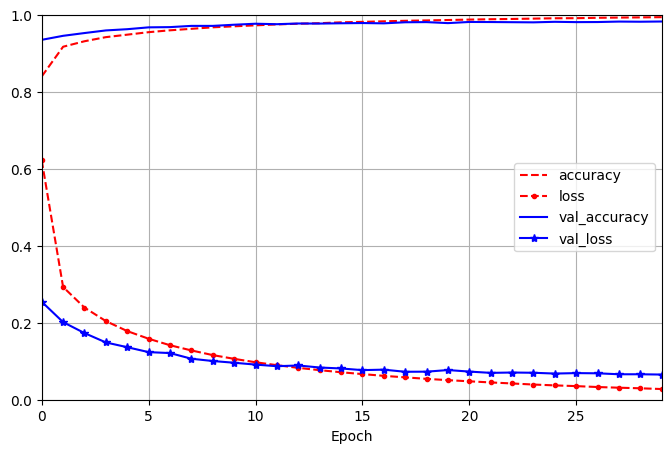

In [12]:
# Plot training history
pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.show()

In [13]:
# Evaluate model on test set
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9745 - loss: 0.0793


[0.06875481456518173, 0.9776999950408936]

In [14]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [15]:
y_pred = y_proba.argmax(axis=-1)
y_pred

array([7, 2, 1])

In [16]:
# Compare predictions with actual labels
y_new = y_test[:3]
y_new

array([7, 2, 1], dtype=uint8)